<h2>Dataset Link</h2>

https://www.kaggle.com/datasets/arunjathari/bostonhousepricedata

<h2>Data Info</h2>

<h2>Data Preprocessing</h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
import joblib
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import tensorflow as tf
import random
from keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Dataset/Boston-house-price-data.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [4]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.shape

(506, 14)

In [8]:
df.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
MEDV       229
dtype: int64

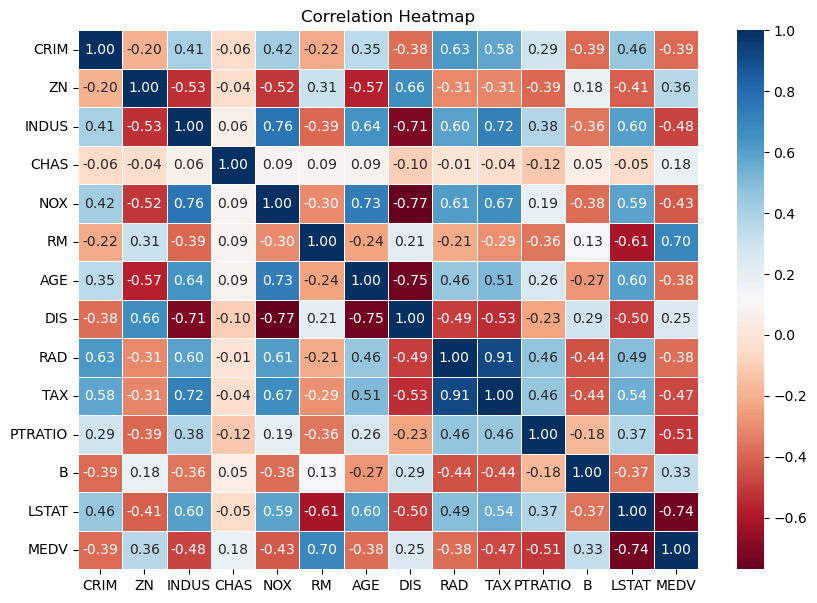

In [9]:
plt.figure(figsize=(10, 7))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='RdBu', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show();

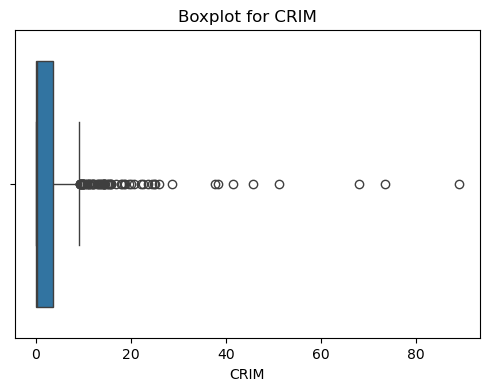

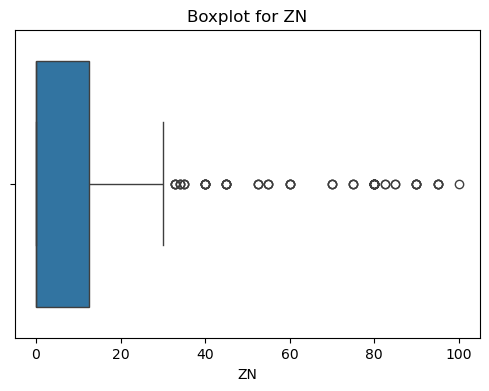

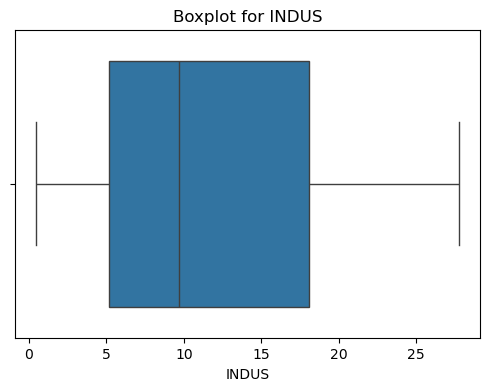

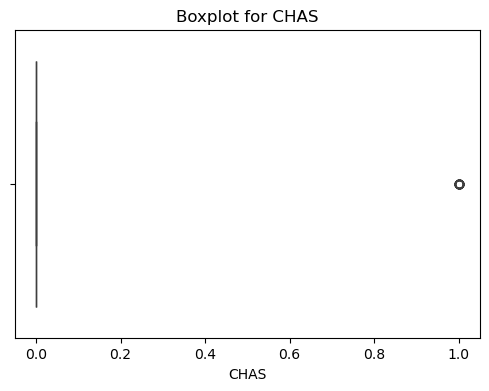

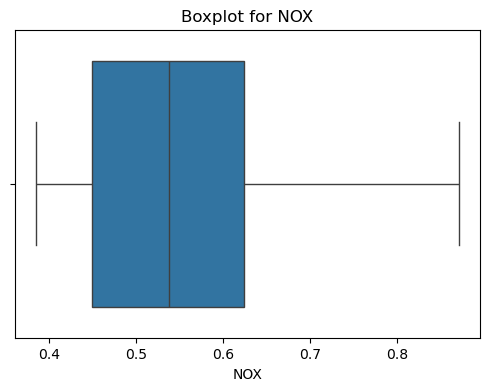

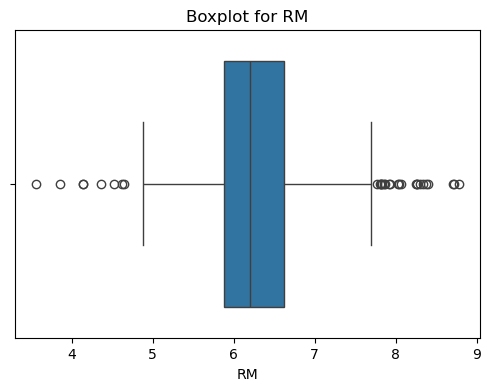

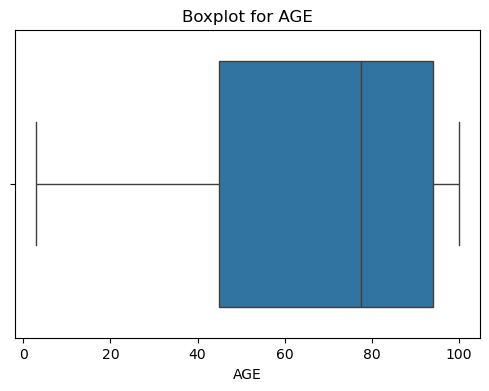

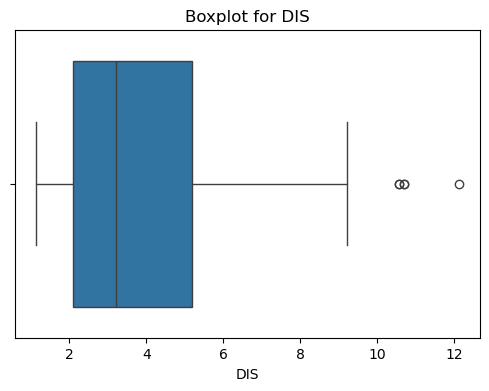

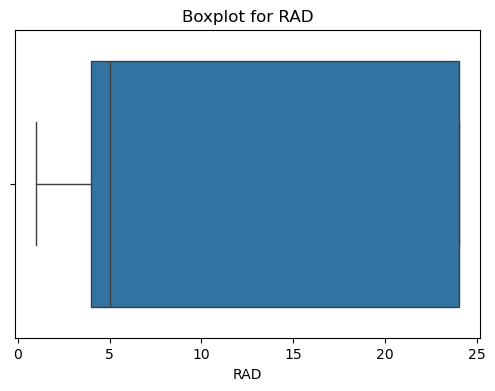

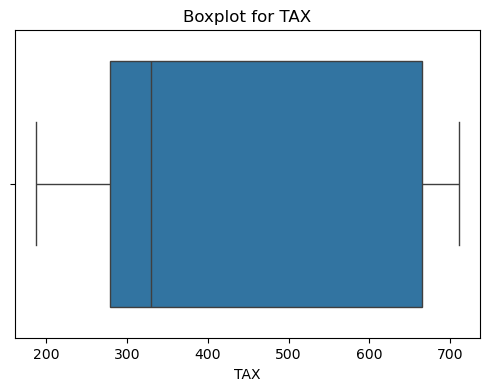

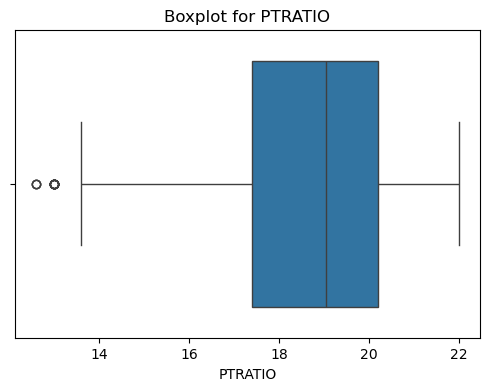

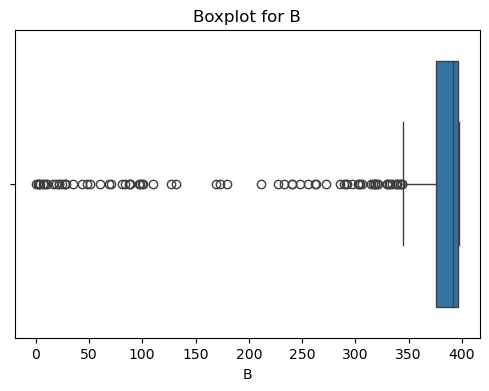

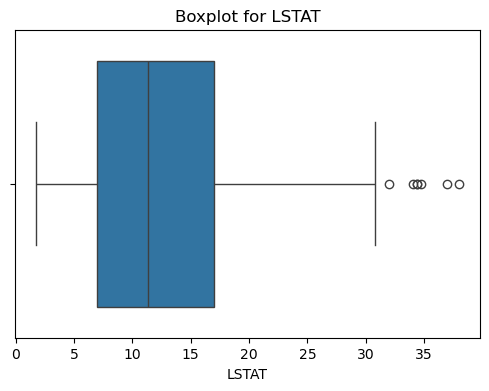

In [10]:
for col in df.columns:
    if col !="MEDV":
        plt.figure(figsize=(6, 4))
        sns.boxplot(x=df[col])
        plt.title(f"Boxplot for {col}")
        plt.show();

In [11]:
df['CHAS'].value_counts()

CHAS
0    471
1     35
Name: count, dtype: int64

In [12]:
x = df.drop('MEDV', axis=1)
y = df['MEDV']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [13]:
print("Mean Skewness before transformation:", x_train.skew().mean())

Mean Skewness before transformation: 0.9257867098044925


In [14]:
for col_name, value in x_train.items():
    Q1 = value.quantile(0.25)
    Q3 = value.quantile(0.75)
    IQR = Q3 - Q1

    # Outlier Bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify Outliers
    outliers = value[(value <= lower_bound) | (value >= upper_bound)]
    outliers_pct = np.shape(outliers)[0] * 100.0 / np.shape(x_train)[0]
    print(f"{col_name}: {outliers_pct:.2f}%")

CRIM: 15.10%
ZN: 8.91%
INDUS: 0.00%
CHAS: 100.00%
NOX: 0.00%
RM: 5.94%
AGE: 0.00%
DIS: 0.74%
RAD: 25.00%
TAX: 0.00%
PTRATIO: 0.00%
B: 15.59%
LSTAT: 1.73%


<h3>Compare different transformation methods</h3>

In [15]:
#Yeo-Johnson Transformation
x_train_yj = x_train.copy()

power_transformer = PowerTransformer(method='yeo-johnson')
train_transformed = power_transformer.fit_transform(x_train_yj)
train_transformed_df = pd.DataFrame(train_transformed, columns=x_train_yj.columns)

print("Mean Skewness after Yeo-Johnson:", train_transformed_df.skew().mean())

Mean Skewness after Yeo-Johnson: 0.20041512738470008


In [16]:
# log transformation
x_train_log = x_train.copy() 
x_train_log = np.log1p(x_train_log.clip(lower=1))  

print("Mean Skewness after Log Transformation:", x_train_log.skew().mean())

Mean Skewness after Log Transformation: -0.2575348295221981


In [17]:
# Square Root Transformation
x_train_sqrt = x_train.copy()
x_train_sqrt = np.sqrt(x_train_sqrt)
print("Mean Skewness after sqrt:", x_train_sqrt.skew().mean())

Mean Skewness after sqrt: 0.3674998636367792


<h2>Data Transformation using Yeo-Johnson Transformation</h2>

In [18]:
power_transformer = PowerTransformer(method='yeo-johnson')

x_train_transformed = power_transformer.fit_transform(x_train)
x_train_transformed = pd.DataFrame(x_train_transformed, columns=x_train.columns)  

x_test_transformed = power_transformer.transform(x_test)
x_test_transformed = pd.DataFrame(x_test_transformed, columns=x_test.columns)

In [19]:
for col_name, value in x_train_transformed.items():
    Q1 = value.quantile(0.25)
    Q3 = value.quantile(0.75)
    IQR = Q3 - Q1

    # Outlier Bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify Outliers
    outliers = value[(value <= lower_bound) | (value >= upper_bound)]
    outliers_pct = np.shape(outliers)[0] * 100.0 / np.shape(x_train)[0]
    print(f"{col_name}: {outliers_pct:.2f}%")

CRIM: 0.00%
ZN: 0.00%
INDUS: 0.00%
CHAS: 100.00%
NOX: 0.00%
RM: 5.20%
AGE: 0.00%
DIS: 0.00%
RAD: 4.21%
TAX: 0.00%
PTRATIO: 0.00%
B: 13.86%
LSTAT: 0.00%


<h2>Machine learning</h2>

In [20]:
xgb = XGBRegressor(n_estimators=300, learning_rate=0.1, max_depth=5, random_state = 42)
xgb.fit(x_train_transformed, y_train)
r2_train = xgb.score(x_train_transformed, y_train)

# Make predictions
y_pred = xgb.predict(x_test_transformed)
r2_test = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Display results
print(f"R-squared(Train): {r2_train:.4f}")
print(f"R-squared(Test): {r2_test:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")

R-squared(Train): 0.9999
R-squared(Test): 0.9167
MAE: 1.8186
RMSE: 2.4710


LSTAT      0.374047
RM         0.334411
DIS        0.072569
TAX        0.049753
PTRATIO    0.049242
CRIM       0.033474
NOX        0.030268
CHAS       0.016748
B          0.012303
AGE        0.011406
RAD        0.008395
INDUS      0.005407
ZN         0.001978
dtype: float32


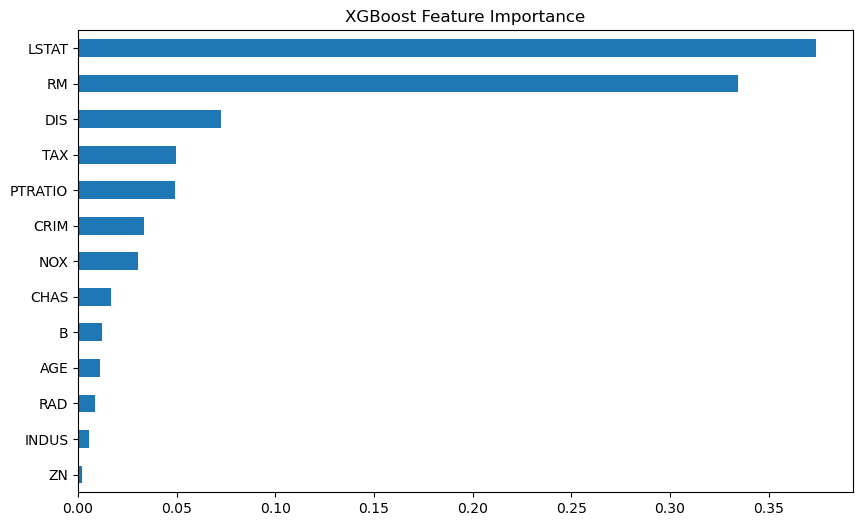

In [21]:
feature_importance = pd.Series(xgb.feature_importances_, index=x_train_transformed.columns)
print(feature_importance.sort_values(ascending=False))

# Plot feature importance
plt.figure(figsize=(10, 6))
feature_importance.sort_values(ascending=True).plot(kind="barh")
plt.title("XGBoost Feature Importance")
plt.show()

In [22]:
gbr = GradientBoostingRegressor(n_estimators=500, max_depth=5, random_state=42)
gbr.fit(x_train_transformed, y_train)
r2_train = gbr.score(x_train_transformed, y_train)

# Make predictions
y_pred = gbr.predict(x_test_transformed)
r2_test = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Display results
print(f"R-squared(Train): {r2_train:.4f}")
print(f"R-squared(Test): {r2_test:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")

R-squared(Train): 1.0000
R-squared(Test): 0.9284
MAE: 1.7988
RMSE: 2.2918


In [23]:
lr = LinearRegression()
lr.fit(x_train_transformed, y_train)
r2_train = lr.score(x_train_transformed, y_train)

# Make predictions
y_pred = lr.predict(x_test_transformed)
r2_test = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Display results
print(f"R-squared(Train): {r2_train:.4f}")
print(f"R-squared(Test): {r2_test:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")

R-squared(Train): 0.7793
R-squared(Test): 0.7315
MAE: 2.9462
RMSE: 4.4374


In [24]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=42)
rf.fit(x_train_transformed, y_train)
r2_train = rf.score(x_train_transformed, y_train)

# Make predictions
y_pred = rf.predict(x_test_transformed)
r2_test = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Display results
print(f"R-squared(Train): {r2_train:.4f}")
print(f"R-squared(Test): {r2_test:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")

R-squared(Train): 0.9773
R-squared(Test): 0.8909
MAE: 2.0627
RMSE: 2.8281


In [25]:
# Save all ML models
joblib.dump(xgb, 'XGB_model.pkl')
print('XGB_model saved succesfully!')
joblib.dump(gbr, 'GBR_model.pkl')
print('GBR_model saved succesfully!')
joblib.dump(lr, 'LR_model.pkl')
print('LR_model saved succesfully!')

XGB_model saved succesfully!
GBR_model saved succesfully!
LR_model saved succesfully!


<h2>Deep Learning</h2>

In [26]:
tf.random.set_seed(42)

DL_model = tf.keras.Sequential([
    tf.keras.layers.Dense(144, activation='relu', input_shape=(x_train.shape[1],)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(80, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1)
])

# Compile the model
DL_model.compile(optimizer='RMSProp', loss='mse', metrics=['mae'])

# Train the model
history = DL_model.fit(x_train_transformed, y_train, epochs=200, batch_size=16, validation_data=(x_test_transformed, y_test), callbacks=[EarlyStopping(patience=5)])  

Epoch 1/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - loss: 515.4205 - mae: 20.9581 - val_loss: 262.3646 - val_mae: 14.2755
Epoch 2/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 242.6009 - mae: 13.3974 - val_loss: 81.5994 - val_mae: 7.2420
Epoch 3/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 87.3822 - mae: 7.3197 - val_loss: 45.2104 - val_mae: 5.0681
Epoch 4/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 52.5154 - mae: 5.9662 - val_loss: 35.3476 - val_mae: 4.4255
Epoch 5/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 37.6355 - mae: 4.7830 - val_loss: 27.4665 - val_mae: 3.7658
Epoch 6/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 31.8229 - mae: 4.4074 - val_loss: 22.1585 - val_mae: 3.2487
Epoch 7/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 25.9591 - mae: 3.8842 - val_loss: 19.5424 - val_mae: 2.9040
Epoch 8/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 22.2962 - mae: 3.4717 - val_loss: 18.1338 - val_mae: 2.8092
Epoch 9/200
26/26 ━━━━━━━━━━━━━━━

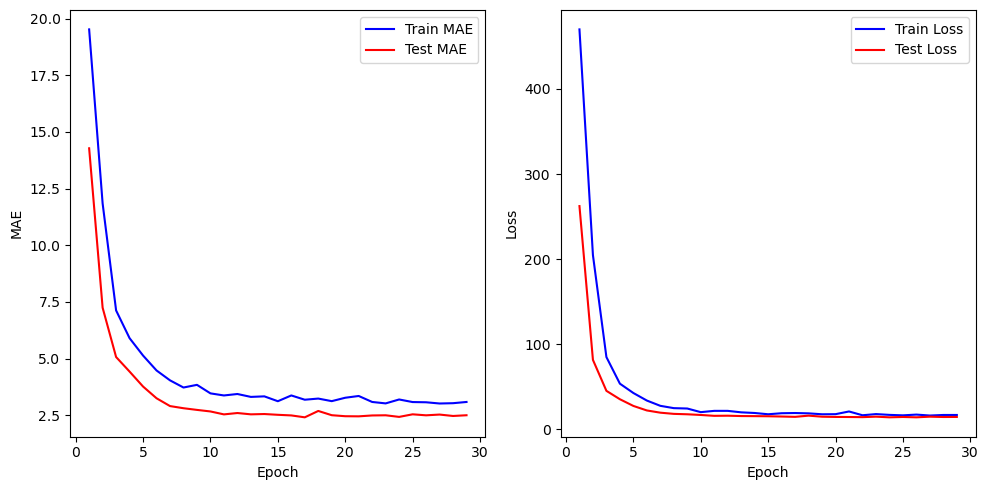

In [27]:
# learning curve
mae = history.history['mae']
val_mae = history.history['val_mae']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(mae) + 1)
# creating subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].plot(epochs, mae, 'b', label='Train MAE')
axes[0].plot(epochs, val_mae, 'r', label='Test MAE')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('MAE')
axes[0].legend()

axes[1].plot(epochs, loss, 'b', label='Train Loss')
axes[1].plot(epochs, val_loss, 'r', label='Test Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()

plt.tight_layout()

plt.show();

In [28]:
y_pred = DL_model.predict(x_test_transformed)

# Evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R2): {r2:.4f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Root Mean Squared Error (RMSE): 3.8121
Mean Absolute Error (MAE): 2.4995
R-squared (R2): 0.8018


In [29]:
# Save DL model
DL_model.save('DL_model.keras')
print('DL model saved succeefully!')

DL model saved succeefully!


<h2>Machine Learning vs Deep Learning</h2>

In [30]:
# Load Models
XGB_model = joblib.load('XGB_model.pkl')
GBR_model = joblib.load('GBR_model.pkl')
LR_model = joblib.load('LR_model.pkl')
DL_model = load_model('DL_model.keras')

# get user input
CRIM = float(input("Enter per capita crime rate by town: "))
ZN = float(input("Enter the proportion of residential land zoned for lots over 25,000 sq.ft.: "))
INDUS = float(input("Enter the proportion of non-retail business acres per town: "))
CHAS = int(input("Enter 1 if tract bounds Charles river; 0 otherwise: "))
NOX = float(input("Enter the nitric oxides concentration (parts per 10 million): "))    
RM = float(input("Enter the average number of rooms per dwelling: "))     
AGE = float(input("Enter the proportion of owner-occupied units built prior to 1940: ")) 
DIS = float(input("Enter the weighted distances to five Boston employment centres: "))  
RAD = int(input("Enter the index of accessibility to radial highways: "))
TAX = float(input("Enter the full-value property-tax rate per $10,000: "))  
PTRATIO = float(input("Enter the pupil-teacher ratio by town: "))  
B =  float(input("Enter the 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town: "))  
LSTAT = float(input("Enter the % lower status of the population: "))  

# Make predictions
new_data = [[CRIM, ZN, INDUS, CHAS,	NOX, RM, AGE, DIS, RAD, TAX, PTRATIO, B, LSTAT]]
transformed_new_data = power_transformer.transform(new_data)
XBG_prediction = XGB_model.predict(transformed_new_data)
BGR_prediction = GBR_model.predict(transformed_new_data)
LR_prediction = LR_model.predict(transformed_new_data)
DL_prediction = DL_model.predict(transformed_new_data)

print('')
print("XGB predicted median value of owner-occupied homes in $1000's: ", XBG_prediction)
print("GBR predicted median value of owner-occupied homes in $1000's: ", BGR_prediction)
print("LR predicted median value of owner-occupied homes in $1000's: ", LR_prediction)
print("DL predicted median value of owner-occupied homes in $1000's: ", DL_prediction)

Enter per capita crime rate by town:  0.04
Enter the proportion of residential land zoned for lots over 25,000 sq.ft.:  80
Enter the proportion of non-retail business acres per town:  3.4
Enter 1 if tract bounds Charles river; 0 otherwise:  0
Enter the nitric oxides concentration (parts per 10 million):  0.4
Enter the average number of rooms per dwelling:  6.29
Enter the proportion of owner-occupied units built prior to 1940:  18
Enter the weighted distances to five Boston employment centres:  6.6
Enter the index of accessibility to radial highways:  4
Enter the full-value property-tax rate per $10,000:  335
Enter the pupil-teacher ratio by town:  16
Enter the 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town:  397
Enter the % lower status of the population:  4.6


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step

XGB predicted median value of owner-occupied homes in $1000's:  [23.667885]
GBR predicted median value of owner-occupied homes in $1000's:  [23.39711074]
LR predicted median value of owner-occupied homes in $1000's:  [30.69729548]
DL predicted median value of owner-occupied homes in $1000's:  [[27.49295]]
